In [7]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# (c) Tariq Rashid, 2016
# license is GPLv2

# Modified by Eros Hernández 
# Description: adding the learning capability for counting from 0 to 7 in binary format  
# assignment for the AI course - Semester II 2017
# Costa Rica's Institute of Technology

In [8]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot as plt
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [9]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        
        totalError = numpy.sum(abs(output_errors)) / self.onodes
        # Value between 0 and 1
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        return totalError

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    def trainingForSet(self,training_data_list, epochs, learning_rate, label):
        self.lr = learning_rate
        epochAxis = numpy.zeros(epochs)
        index = 0
        epochError = numpy.zeros(epochs)
        for e in range(epochs):
            # go through all records in the training data set
            for record in training_data_list:
                # split the record by the ',' commas
                all_values = record.split(',')
                inputs = (numpy.asfarray(all_values[0:3]))
                targets = numpy.asfarray(all_values[3:])
                epochError[index]+= self.train(inputs, targets)
                pass

            epochError[index]/= len(training_data_list)
            epochAxis[index] = e
            index+=1
            # Let's print the weights for each iteration and see how they change
            print(self.wih)
            print(self.who)
            pass
        plt.plot(epochAxis, epochError, label = label)

In [10]:
# number of input, hidden and output nodes
input_nodes = 3
hidden_nodes = 10
output_nodes = 3

# learning rate
learning_rate = 0.5

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [11]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/countTrain_50.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

[[-0.5116518  -1.2072162  -3.18396467]
 [ 0.00777233  1.48527184 -4.14044468]
 [-3.83833623  1.9425246   3.82712058]
 [ 1.23175667  0.84447475  1.64397734]
 [ 1.5603162  -2.04587091 -3.73350152]
 [ 0.49001316 -0.17941584 -2.53251053]
 [ 0.63187034  0.07845224  1.01223626]
 [ 0.66098375 -0.82452584  2.83393063]
 [ 2.51724586  0.48121607  2.03932116]
 [-0.5524464   1.87963453 -4.65236476]]
[[-0.94608322 -0.35918629 -2.3423721   0.52070892  0.77005623 -0.09360155
   0.1218317   0.25133802  1.40748573 -0.57490753]
 [-1.04865799  0.86219068 -0.23781359  0.54161497 -1.22144441 -0.43638027
  -0.29803441 -0.27778695 -0.0167069   1.10391024]
 [ 1.68439068  1.79813814 -1.42744997 -0.19308888  1.07622929  1.10571454
  -0.20939049 -0.95509649 -0.53301061  2.04243037]]
[[-0.51168586 -1.20751631 -3.18415578]
 [ 0.00765823  1.48547467 -4.14083731]
 [-3.8388043   1.94305663  3.82730314]
 [ 1.23189103  0.84466306  1.64417008]
 [ 1.56030432 -2.04622098 -3.73396537]
 [ 0.49001835 -0.17941234 -2.53272531]

 [ -5.57038216e-01   1.88782979e+00  -4.66899729e+00]]
[[-0.95318708 -0.36000787 -2.35531713  0.52248004  0.76873568 -0.09626675
   0.11911074  0.24686192  1.41000139 -0.57619703]
 [-1.05763283  0.86395744 -0.24509754  0.54237234 -1.23296052 -0.43992972
  -0.29843637 -0.27981146 -0.01582589  1.10844095]
 [ 1.68644902  1.80198916 -1.42768651 -0.19308895  1.07864246  1.10853002
  -0.20951916 -0.95642244 -0.53307988  2.0462503 ]]
[[ -5.13074850e-01  -1.21904431e+00  -3.19145950e+00]
 [  3.36352201e-03   1.49316874e+00  -4.15570991e+00]
 [ -3.85710021e+00   1.96293057e+00   3.83382239e+00]
 [  1.23703362e+00   8.51889500e-01   1.65156682e+00]
 [  1.55983808e+00  -2.05953917e+00  -3.75154735e+00]
 [  4.90146650e-01  -1.79356581e-01  -2.54090414e+00]
 [  6.31715322e-01   8.31182260e-02   1.01397029e+00]
 [  6.60029717e-01  -8.27747151e-01   2.84269869e+00]
 [  2.52346699e+00   4.86121945e-01   2.04393383e+00]
 [ -5.57158465e-01   1.88804472e+00  -4.66943386e+00]]
[[-0.95337164 -0.36002485 -2

 [ 0.54511844 -0.23403722  0.55507823]]
[[-0.39106307  0.48062219  0.12806628  0.05545856  0.19341061 -0.00831124
  -0.28639623  0.10343464 -0.33532088  0.34951569]
 [-0.18715794  0.08948816  0.13910736  0.24961021  0.31524373  0.00805127
   0.24439444  0.19165743 -0.1657872  -0.59340135]
 [ 0.13058761  0.08534731 -0.45025558  0.01048297 -0.64246488  0.28063401
   0.29745785 -0.33063644  0.03956916  0.71002969]]
[[-1.00964793  0.15002108  0.17481872]
 [ 0.15554543  0.80251507  1.30022527]
 [-0.2941505   0.02704185  0.78731393]
 [ 0.10995717  0.0246158   0.23843798]
 [-0.09983984 -0.75769798  0.40103353]
 [ 0.79681605  1.098451   -0.87601018]
 [-0.37713799 -0.21150395  0.74182438]
 [ 0.35138255  0.25812247 -0.57366061]
 [ 0.37499357 -0.22649727  0.14343318]
 [ 0.5468503  -0.2350994   0.54508498]]
[[-0.39393353  0.47854086  0.1257562   0.05382106  0.19170674 -0.00927386
  -0.2886879   0.10228035 -0.3365438   0.34833509]
 [-0.188733    0.08765763  0.13717209  0.24789498  0.31395661  0.005

 [ 0.64789241 -0.2291851   0.16445773]]
[[-0.49453571  0.44655849  0.06415231  0.02183788  0.14913129 -0.00859557
  -0.35494126  0.08876035 -0.35361071  0.34524804]
 [-0.22943283  0.05908882  0.08791415  0.2105797   0.28295535 -0.03951879
   0.20015139  0.16216361 -0.19934958 -0.63098709]
 [ 0.10324097 -0.08343181 -0.60681274 -0.02945663 -0.73497968  0.41917272
   0.18657262 -0.24846752  0.01759563  0.65495856]]
[[-1.1019989   0.16736345  0.13457405]
 [ 0.28990576  0.79881827  1.30089286]
 [-0.29156637  0.01493841  1.10377225]
 [ 0.11898778  0.01192841  0.23677381]
 [-0.06860918 -0.72852054  0.84360794]
 [ 0.76970002  1.05211845 -1.09274721]
 [-0.46126011 -0.22920542  0.57355653]
 [ 0.37716643  0.26154487 -0.37991102]
 [ 0.28459254 -0.21254226  0.1571875 ]
 [ 0.64998319 -0.22867972  0.15707237]]
[[-0.49633068  0.44660817  0.06333609  0.02162134  0.14864292 -0.00816703
  -0.35595124  0.08889881 -0.35360243  0.34573366]
 [-0.22995933  0.059071    0.08727504  0.21023182  0.28254922 -0.039

[[ 0.51276523  0.19464355 -0.19080347]
 [-0.60602679  0.3746824  -0.30401116]
 [ 0.30288997 -0.696643    0.91997698]
 [ 0.84535283 -0.53390461  0.0362254 ]
 [ 0.79385407 -0.6983323   0.38955618]
 [ 0.42252666 -0.41579236  0.49516784]
 [-0.52748451  0.31313451  0.60692232]
 [ 1.24587471 -0.40091422 -0.91680657]
 [ 0.46743783  0.04188823  0.64521592]
 [-0.46303803 -0.33815009 -0.25759975]]
[[ 0.38097207 -0.4053151  -0.64752317  0.12657585 -0.3775689   0.29062485
   0.58987123  0.11150935  0.21927059 -0.08209359]
 [-0.19492695 -0.41029366 -0.13357549  0.03330697  0.15189536 -0.3122815
   0.43659852  0.19262521 -0.22699799  0.50024018]
 [ 0.22753959  0.41225253 -0.02045531 -0.29997159 -0.18369898 -0.41538802
  -0.31528251  0.41003323 -0.26301285  0.49353857]]
[[ 0.51729162  0.1941028  -0.19674806]
 [-0.6092203   0.37521899 -0.31354446]
 [ 0.29624906 -0.69621152  0.92132882]
 [ 0.8457566  -0.53404364  0.04365559]
 [ 0.78954377 -0.69835032  0.39431544]
 [ 0.42375724 -0.41560405  0.50644675]


 [ 0.5645397  -0.15860278 -0.54006123]]
[[ 0.27817009  0.14465602  0.22583823 -0.50882415  0.56500219 -0.33312154
   0.45350809 -0.84967783 -0.32129481  0.31831056]
 [ 0.75879601  0.02880543 -0.28187007  0.13116487 -0.26603406  0.3004423
  -0.0573954  -0.18816093 -0.38367266 -0.21697915]
 [ 0.94852662 -0.56934703  0.93873388  1.09737091 -1.17393585 -0.33214336
   1.12081776 -0.66592309  0.41524604  0.23404078]]
[[ 0.65766984  0.32697829 -2.03811284]
 [ 0.93591585 -0.23176811  0.99112335]
 [ 0.99485001 -0.90811921 -2.20972231]
 [-0.43264428  0.50452309 -2.43936107]
 [ 0.35846621 -0.62424516  2.2702014 ]
 [-0.09541031 -0.31155238  0.66086873]
 [ 0.90421321  0.10717022 -2.31250952]
 [-1.59538469  0.5395851   1.44184413]
 [-0.70735658 -0.22381019 -0.98051455]
 [ 0.57417229 -0.15672081 -0.55288337]]
[[ 0.27739659  0.15494414  0.23149237 -0.52060971  0.57212411 -0.33401486
   0.45520725 -0.86308004 -0.33436129  0.32022774]
 [ 0.75948076  0.03059301 -0.29088069  0.13600544 -0.26884966  0.3026

[[  4.22382036e-01  -4.99231845e-01  -3.57336655e-01  -5.18290030e-01
   -6.18184271e-01  -5.28816672e-01   1.20019450e+00  -1.78439590e-01
   -9.36559859e-02   5.09691468e-01]
 [ -1.57264901e-02   4.54487865e-01   4.65948050e-01  -1.16080982e-03
    6.81381779e-01  -5.92433872e-01  -1.56876666e-01   7.90309754e-02
   -5.54533331e-01  -2.91412322e-01]
 [ -6.99450406e-01   9.27214828e-01   8.91055700e-01  -5.43418289e-01
   -6.04141420e-01  -5.22112527e-01   2.12967307e-01   1.45580729e+00
    1.73751344e+00  -5.89866086e-01]]
[[ 0.52842333  0.36637423  1.46259054]
 [-0.4903354   0.56602162 -2.04954298]
 [-0.10775479  0.15720276 -1.75310149]
 [-0.91086161 -0.02512909  1.34245053]
 [-0.70688779  0.67638628  1.79001892]
 [-1.07981901  0.31315791  1.2096662 ]
 [ 1.90599279  0.76658232 -0.06335094]
 [ 0.30207736  0.74272609 -2.69014452]
 [ 0.56993449 -0.0417621  -2.87655815]
 [ 0.96561473 -0.39392486  1.52861721]]
[[ 0.42965692 -0.51111042 -0.36349753 -0.53711977 -0.63823588 -0.55110273
   

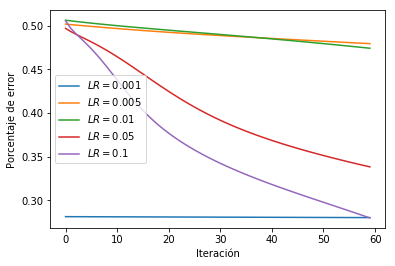

In [16]:
# train the neural network
# epochs is the number of times the training data set is used for training
epochs = 60
n.trainingForSet(training_data_list, epochs, 0.001, '$LR = 0.001$')
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
n.trainingForSet(training_data_list, epochs, 0.005, '$LR = 0.005$')
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
n.trainingForSet(training_data_list, epochs, 0.01, '$LR = 0.01$')
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
n.trainingForSet(training_data_list, epochs, 0.05, '$LR = 0.05$')
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
n.trainingForSet(training_data_list, epochs, 0.1, '$LR = 0.1$')

# We choose the learning rate of 0.1 for the testing phase

plt.xlabel('Iteración')
plt.ylabel('Porcentaje de error')
plt.legend(loc='best')
plt.show()

In [17]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/countTest_62.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [18]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[0:3]))
    # query the network
    outputs = n.query(inputs)
    
    targets = numpy.asfarray(all_values[3:])
        
    # append correct or incorrect to list
    if (numpy.array_equal(numpy.where(targets==1.0),numpy.where(outputs.T[0]>0.5))):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [19]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.41935483871


In [20]:
# Test for each individual number
zero = numpy.array([0,0,0])
one = numpy.array([0,0,1])
two = numpy.array([0,1,0])
three = numpy.array([0,1,1])
four = numpy.array([1,0,0])
five = numpy.array([1,0,1])
six = numpy.array([1,1,0])
seven = numpy.array([1,1,1])

#We change the next value if we want to test the counter
print(n.query(three)) 

[[ 0.49819587]
 [ 0.41593491]
 [ 0.06006787]]
